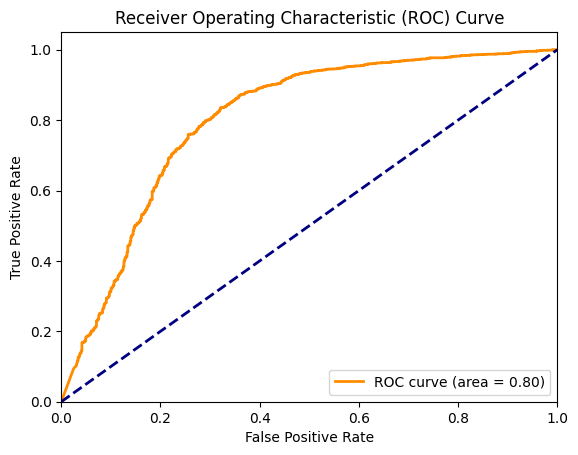

In [ ]:
import pandas as pd
import json
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# Step 1: Load the Dataset
file_path = '/Users/aqibullah/Downloads/15000.json'
with open(file_path, 'r') as f:
    data = [json.loads(line) for line in f]

df = pd.DataFrame(data)

# Step 2: Preprocess the Data
# Convert ratings to binary sentiment (1 for positive, 0 for negative)
df['sentiment'] = df['overall'].apply(lambda x: 1 if x >= 4 else 0)

# Step 3: Vectorize the Text
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['reviewText'])
y = df['sentiment']

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Step 6: Predict Probabilities
y_probs = nb_classifier.predict_proba(X_test)[:, 1]

# Step 7: Calculate ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Step 8: Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()